# importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

# Explore and clean data

In [2]:
df = pd.read_csv('LapTop_Prices.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
df.shape

(893, 18)

HP         186
Lenovo     169
Asus       157
Dell       107
Acer        84
MSI         65
Samsung     28
Apple       16
Infinix     15
LG           9
Name: brand, dtype: int64


<Axes: >

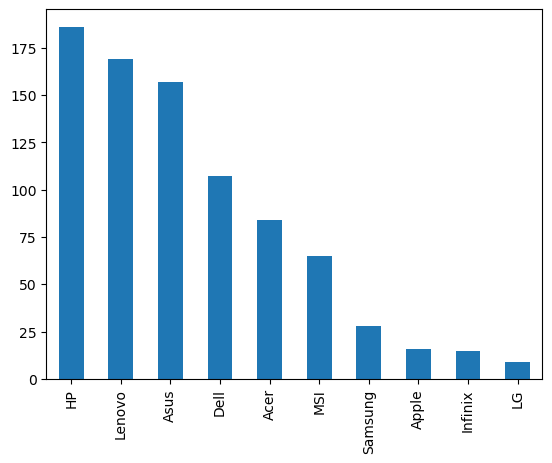

In [4]:
print(df.brand.value_counts().head(10))
df.brand.value_counts().head(10).plot(kind='bar')

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [6]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '32GB', '2GB', '12GB', '64GB'], dtype=object)

In [7]:
df['Ram'] = df.Ram.str.replace('GB', '')

In [8]:
df.Ram.unique()

array(['8', '16', '4', '32', '2', '12', '64'], dtype=object)

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [10]:
df.ROM_type.unique()

array(['SSD', 'Hard-Disk'], dtype=object)

In [11]:
import plotly.express as px

In [12]:
ROM = df.ROM_type.value_counts()

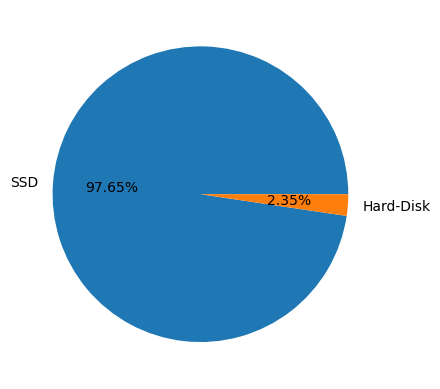

In [13]:
plt.pie(ROM, labels = ROM.index, autopct='%.2f%%')
plt.show()

HP         186
Lenovo     169
Asus       157
Dell       107
Acer        84
MSI         65
Samsung     28
Apple       16
Infinix     15
LG           9
Name: brand, dtype: int64


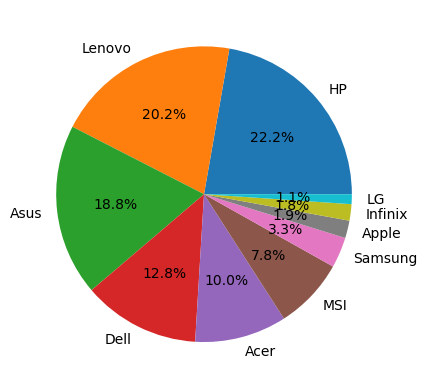

In [14]:
brand_name = df.brand.value_counts().head(10)
print(brand_name)
plt.pie(brand_name, labels=brand_name.index, autopct='%.1f%%')
plt.show()

In [15]:
df.ROM.unique()

array(['512GB', '256GB', '128GB', '64GB', '1TB', '32GB', '2TB'],
      dtype=object)

In [16]:
df['ROM'] = df.ROM.str.replace('GB', '')
df['ROM'] = df.ROM.str.replace('TB', '000')

In [17]:
df.ROM.unique()

array(['512', '256', '128', '64', '1000', '32', '2000'], dtype=object)

In [18]:
df.rename(columns = {'ROM':'ROM_GB'})

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM_GB,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16,DDR,1000,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32,DDR5,1000,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16,DDR4,512,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


Windows 11 OS     782
Windows 10 OS      28
DOS OS             18
Windows 11  OS     15
Mac OS             12
Name: OS, dtype: int64


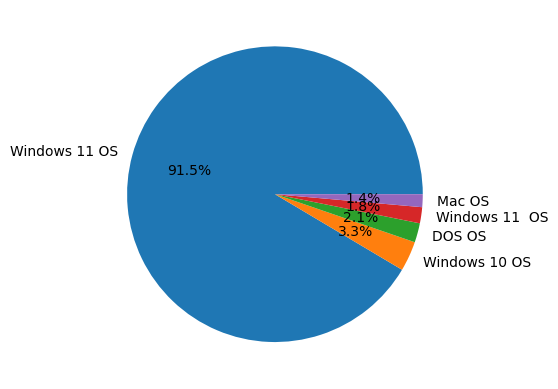

In [19]:
OS_type = df.OS.value_counts().head()
print(OS_type)
plt.pie(OS_type, labels= OS_type.index, autopct='%.1f%%')
plt.show()

Windows 11 OS     782
Windows 10 OS      28
DOS OS             18
Windows 11  OS     15
Mac OS             12
Windows 10  OS     10
Chrome OS          10
Windows OS          9
Ubuntu OS           2
DOS 3.0 OS          2
Name: OS, dtype: int64


<Axes: >

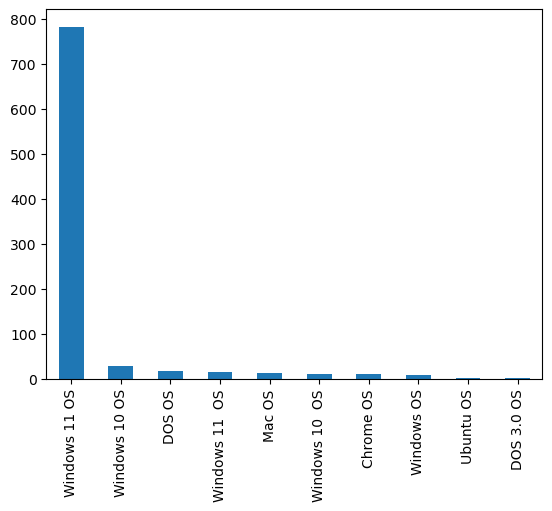

In [20]:
print(df.OS.value_counts().head(10))
df.OS.value_counts().head(10).plot(kind='bar')

Intel Iris Xe Graphics         107
Intel UHD Graphics              63
Intel Integrated UHD            61
AMD Radeon AMD                  55
AMD Radeon Graphics             54
Intel Integrated Iris Xe        51
4GB NVIDIA GeForce RTX 3050     50
8GB NVIDIA GeForce RTX 4060     42
4GB NVIDIA GeForce RTX 2050     39
6GB NVIDIA GeForce RTX 4050     36
Name: GPU, dtype: int64


<Axes: >

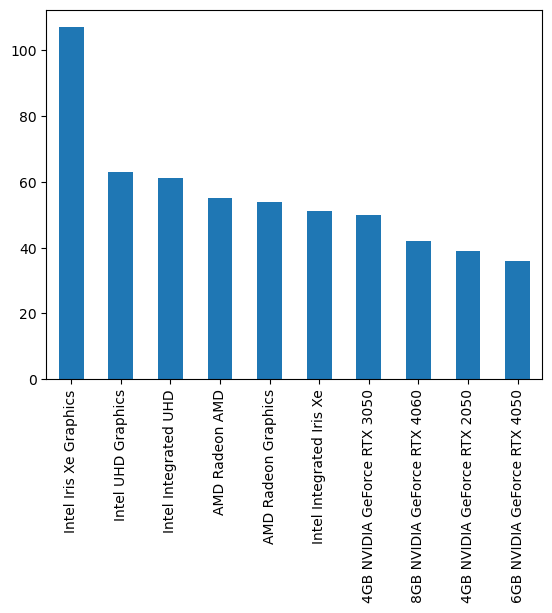

In [21]:
print(df.GPU.value_counts().head(10))
df.GPU.value_counts().head(10).plot(kind='bar')

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [23]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [24]:
drop_col = ['Unnamed: 0.1', 'Unnamed: 0', 'name']

In [25]:
df = df.drop(columns =drop_col, axis=1)

In [26]:
df.shape

(893, 15)

In [27]:
df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,69990,69.323529,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [28]:
df.dtypes

brand                 object
price                  int64
spec_rating          float64
processor             object
CPU                   object
Ram                   object
Ram_type              object
ROM                   object
ROM_type              object
GPU                   object
display_size         float64
resolution_width     float64
resolution_height    float64
OS                    object
warranty               int64
dtype: object

In [29]:
df['ROM'] = df['ROM'].astype(int)
df['Ram'] = df['Ram'].astype(int)

In [30]:
df.dtypes

brand                 object
price                  int64
spec_rating          float64
processor             object
CPU                   object
Ram                    int32
Ram_type              object
ROM                    int32
ROM_type              object
GPU                   object
display_size         float64
resolution_width     float64
resolution_height    float64
OS                    object
warranty               int64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   price              893 non-null    int64  
 2   spec_rating        893 non-null    float64
 3   processor          893 non-null    object 
 4   CPU                893 non-null    object 
 5   Ram                893 non-null    int32  
 6   Ram_type           893 non-null    object 
 7   ROM                893 non-null    int32  
 8   ROM_type           893 non-null    object 
 9   GPU                893 non-null    object 
 10  display_size       893 non-null    float64
 11  resolution_width   893 non-null    float64
 12  resolution_height  893 non-null    float64
 13  OS                 893 non-null    object 
 14  warranty           893 non-null    int64  
dtypes: float64(4), int32(2), int64(2), object(7)
memory usage: 97.8+ KB


In [32]:
df.isnull().sum()

brand                0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [33]:
dummies = pd.get_dummies(df)

In [34]:
dummies

,price,spec_rating,Ram,ROM,display_size,resolution_width,resolution_height,warranty,brand_AXL,brand_Acer,...,OS_Mac 10.15.3\t OS,OS_Mac Catalina OS,OS_Mac High Sierra OS,OS_Mac OS,OS_Ubuntu OS,OS_Windows 10 OS,OS_Windows 10 OS,OS_Windows 11 OS,OS_Windows 11 OS,OS_Windows OS
0,49900,73.000000,8,512,15.6,1920.0,1080.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39900,60.000000,8,512,15.6,1920.0,1080.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26990,69.323529,8,512,14.0,1920.0,1080.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,59729,66.000000,16,512,14.0,2240.0,1400.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,69990,69.323529,8,256,13.3,2560.0,1600.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,44990,69.323529,8,512,15.6,1920.0,1080.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
889,110000,71.000000,16,1000,15.6,2560.0,1440.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
890,189990,89.000000,32,1000,14.0,2560.0,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
891,129990,73.000000,16,512,15.6,1920.0,1080.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
x= dummies.drop('price', axis= 1)
y = df.price

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .15)

# Linear Regression

In [37]:
Lin = LinearRegression().fit(x, y)
Lin

LinearRegression()

In [38]:
Lin.score(x, y)

0.9497796861891354

# Lasso


In [39]:
Las = Lasso(alpha=1).fit(x_train, y_train)
Las

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.932e+09, tolerance: 2.830e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [40]:
Las.score(x_train, y_train)

0.9512020446678505

In [41]:
Las.score(x_test, y_test)

0.8607743286265769

# ridge

In [42]:
Ri = Ridge(alpha=.8).fit(x_train, y_train)
Ri

Ridge(alpha=0.8)

In [43]:
Ri.score(x_train, y_train)

0.9336830885368737

In [44]:
Ri.score(x_test, y_test)

0.8815838117412395